In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
from rasterstats import zonal_stats

## Elevation

In [2]:


zones = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/nigeria/clean_shp.shp"
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/elevation/ELE.tif"

gdf = gpd.read_file(zones)

stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["mean"]))
gdf = gdf.join(stats)


/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [3]:
gdf.rename(columns = {'mean':'mean_elev'}, inplace=True)

Text(0.5, 1.0, 'Average elevation (m.a.s.l.) in Nigerian districts')

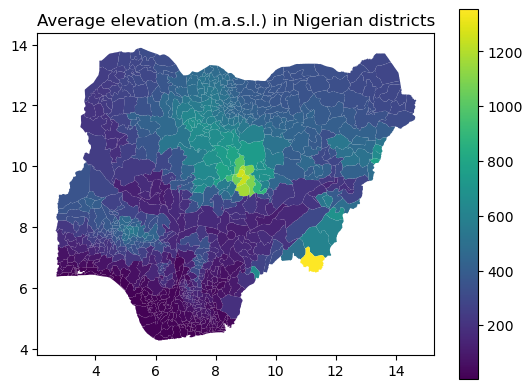

In [4]:
gdf.plot(column='mean_elev', legend=True )
plt.title("Average elevation (m.a.s.l.) in Nigerian districts")

In [5]:
gdf['location'] = gdf['adm2'] + ', ' + gdf['adm1']

## Coastal

In [6]:
coast = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/nigeria/nigeria_coast.shp')

In [7]:
coast['location'] = coast['adm2'] + ', ' + coast['adm1']

In [8]:
gdf['coast'] = [1 if x in coast['location'].unique() else 0 for x in gdf['location']]

<Axes: >

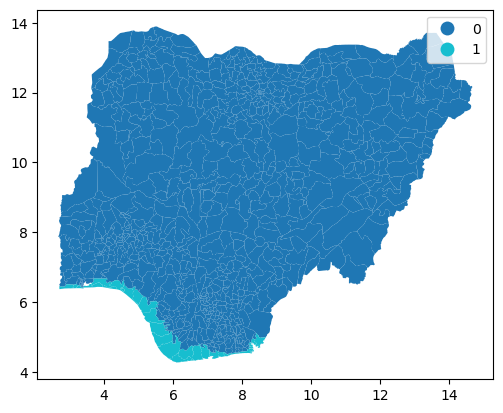

In [9]:
gdf.plot(column='coast', categorical= True, legend=True)

## Human Development Index

In [10]:
import pandas as pd

In [11]:
from unidecode import unidecode


In [12]:
hdi = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/nigeria/GDL-Subnational-HDI-data-5.csv')

In [13]:
hdi.rename(columns={'2021':'HDI'}, inplace=True)

In [14]:
hdi['Region'] = [x.replace('Nassarawa', 'Nasarawa') for x in hdi['Region']]
hdi['Region'] = [x.replace('Zamfora', 'Zamfara') for x in hdi['Region']]
hdi['Region'] = [x.replace('Abuja FCT', 'Federal Capital Territory') for x in hdi['Region']]




In [15]:
gdf = gdf.merge(hdi[['Region', 'HDI']], left_on='adm1', right_on='Region')

<Axes: >

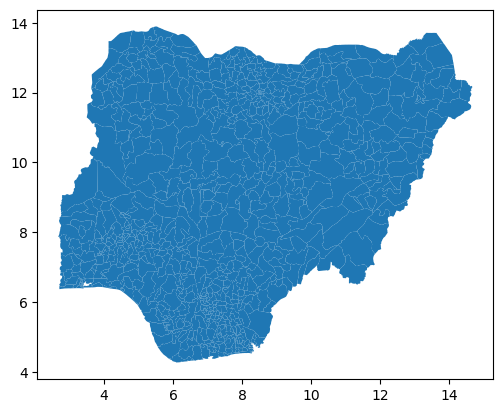

In [16]:
gdf.plot()

Text(0.5, 1.0, 'Provincial HDI France')

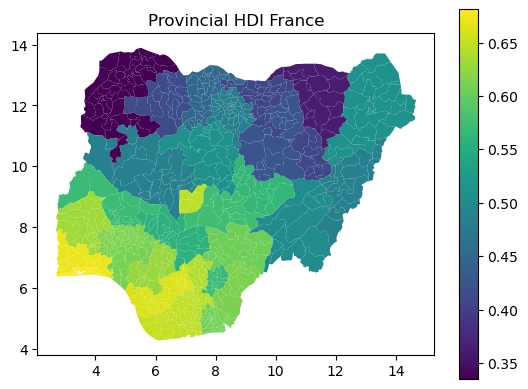

In [17]:
gdf.plot(column='HDI', legend=True)
plt.title('Provincial HDI France')

## Population density

In [18]:
gdf.set_crs(epsg=4326, inplace=True)

,Shape_Leng,Shape_Area,adm2,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,adm1,ADM1_PCODE,ADM0_EN,...,validOn,validTo,SD_EN,SD_PCODE,location,geometry,mean_elev,coast,Region,HDI
0,0.237074,0.001524,Aba North,NG001001,Aba North,None,None,Abia,NG001,Nigeria,...,2019-04-17,None,Abia South,NG00103,"Aba North, Abia","POLYGON ((7.40111 5.08195, 7.40013 5.08237, 7....",58.500000,0,Abia,0.644
1,0.262477,0.003531,Aba South,NG001002,Aba South,None,None,Abia,NG001,Nigeria,...,2019-04-17,None,Abia South,NG00103,"Aba South, Abia","POLYGON ((7.38749 5.08275, 7.38632 5.08236, 7....",57.000000,0,Abia,0.644
2,3.075316,0.326868,Abadam,NG008001,Abadam,None,None,Borno,NG008,Nigeria,...,2019-04-17,None,Borno North,NG00802,"Abadam, Borno","POLYGON ((13.83477 13.42336, 13.81909 13.42175...",288.815940,0,Borno,0.512
3,2.537984,0.068379,Abaji,NG015001,Abaji,None,None,Federal Capital Territory,NG015,Nigeria,...,2019-04-17,None,Federal Capital Territory,NG01501,"Abaji, Federal Capital Territory","POLYGON ((7.04587 9.2305, 7.02654 9.22216, 7.0...",174.632591,0,Federal Capital Territory,0.646
4,0.687150,0.014529,Abak,NG003001,Abak,None,None,Akwa Ibom,NG003,Nigeria,...,2019-04-17,None,Akwa Ibom North West,NG00302,"Abak, Akwa Ibom","POLYGON ((7.81124 5.09453, 7.81233 5.09367, 7....",64.904306,0,Akwa Ibom,0.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1.973339,0.192300,Zango-Kataf,NG019022,Zango-Kataf,None,None,Kaduna,NG019,Nigeria,...,2019-04-17,None,Kaduna South,NG01903,"Zango-Kataf, Kaduna","POLYGON ((8.51617 9.73717, 8.51729 9.73228, 8....",785.509400,0,Kaduna,0.511
770,1.064112,0.032586,Zaria,NG019023,Zaria,None,None,Kaduna,NG019,Nigeria,...,2019-04-17,None,Kaduna North,NG01902,"Zaria, Kaduna","POLYGON ((7.77154 11.12362, 7.77156 11.11693, ...",646.865672,0,Kaduna,0.511
771,1.186195,0.084464,Zing,NG035016,Zing,None,None,Taraba,NG035,Nigeria,...,2019-04-17,None,Taraba North,NG03502,"Zing, Taraba","POLYGON ((11.78946 8.64357, 11.76143 8.6665, 1...",572.115416,0,Taraba,0.501
772,2.611934,0.223538,Zurmi,NG037014,Zurmi,None,None,Zamfara,NG037,Nigeria,...,2019-04-17,None,Zamfara North,NG03702,"Zurmi, Zamfara","POLYGON ((7.04768 12.99911, 7.04995 12.97205, ...",422.378840,0,Zamfara,0.416


In [19]:
#using WorldPop Global2 Populatoin Data Set
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/nigeria/pop/nga_pop_2022_CN_1km_R2025A_UA_v1.tif"


stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
gdf = gdf.join(stats)


# choose correct projection for country
gdf = gdf.to_crs("ESRI:102022") 


#Manually calculate area
gdf['area'] = gdf.geometry.area / 1e6

#manually calculate population density
gdf['popdens'] = gdf['sum'] / gdf['area']

gdf.rename(columns={'ADM0_EN':'adm0'}, inplace=True)


In [20]:
gdf.rename(columns={'mean':'popdens'}, inplace=True)

In [21]:
gdf = gdf[['adm1', 'adm2', 'geometry', 'mean_elev', 'location', 'coast', 'HDI', 'popdens']]

<Axes: >

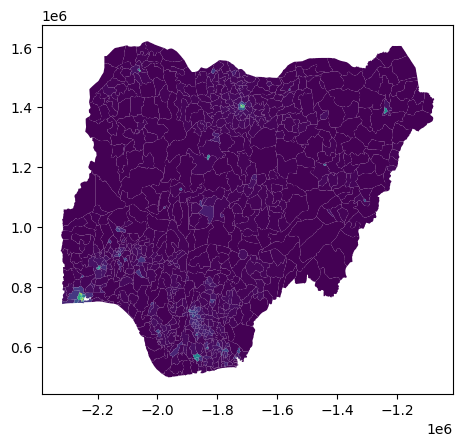

In [22]:
gdf.plot(column='popdens')

## Age

In [23]:
import glob

In [24]:
gdf = gdf.to_crs(epsg=4326) 


In [25]:
gdf['over60_pop'] = 0
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/nigeria/age/*'):
    
    values = file
    
    pop_total = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['over60_pop'] += pop_total['sum']




In [26]:
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/nigeria/pop/*'):
    
    values = file
    
    over_60 = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['pop_total'] = over_60['sum']

In [27]:
gdf['over60_propor'] = gdf['over60_pop'] / gdf['pop_total']

Text(0.5, 1.0, 'Age 60+ population proportion')

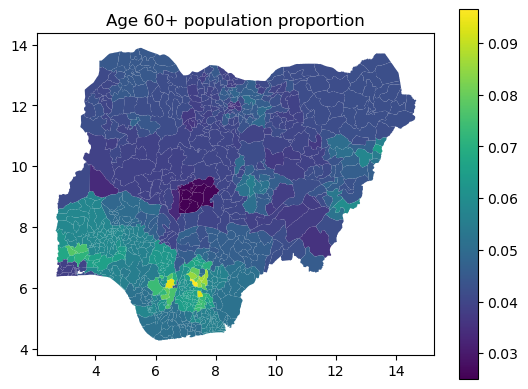

In [28]:
gdf.plot(column='over60_propor', legend=True)
plt.title("Age 60+ population proportion")

In [29]:
HDI_subset = gdf.drop_duplicates('HDI')

In [30]:
deciles = pd.qcut(HDI_subset['HDI'], 10, labels= range(1,11)).astype(int)

In [31]:
HDI_subset['HDI_dec'] = deciles

/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [32]:
gdf = gdf.merge(HDI_subset[['HDI', 'HDI_dec']], on='HDI')

In [33]:
gdf['popden_dec'] = pd.qcut(gdf['popdens'], 10, labels= range(1,11)).astype(int)

In [34]:
gdf = gdf[gdf['over60_propor'].notnull()]

In [35]:
gdf['over60_dec'] = pd.qcut(gdf['over60_propor'], 10, labels= range(1,11)).astype(int)

In [36]:
gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/nigeria/merged_Global2.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_1613/1651107000.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/nigeria/merged_Global2.shp')
/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'over60_propor' to 'over60_pro'
  ogr_write(
